Tugas Modul : Clustering (Modelling 2)

Dataset : Mall Customers Segmentation Data

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load Dataset
df = pd.read_csv("/content/Mall_Customers.csv")  # Ganti path jika beda lokasi
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Overview Dataset**

In [3]:
# Informasi umum dataset
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe())


Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Deskripsi Statistik:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000             

# **Data Checking & Preparation**

In [4]:
# Cek missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Encode Gender
le = LabelEncoder()
df['Gender_enc'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [6]:
# Hapus kolom ID karena tidak berpengaruh
df_prep = df.drop(columns=['CustomerID', 'Gender'])

In [7]:
# Standarisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_prep)

print("Data siap digunakan untuk clustering. Shape:", X_scaled.shape)

Data siap digunakan untuk clustering. Shape: (200, 4)


# **Exploratory Data Analysis (EDA)**

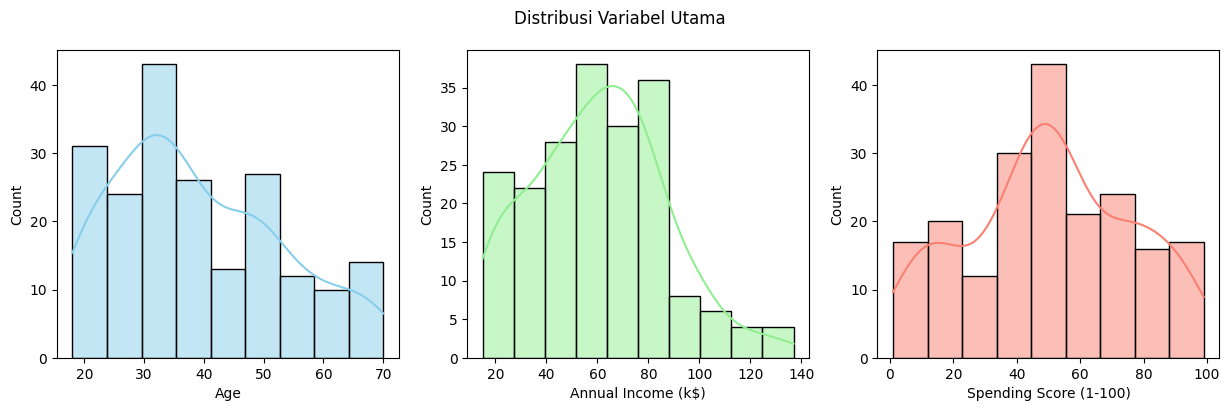

In [8]:
# Distribusi Umur, Pendapatan, dan Spending Score
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1], color='lightgreen')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2], color='salmon')
plt.suptitle("Distribusi Variabel Utama")
plt.show()

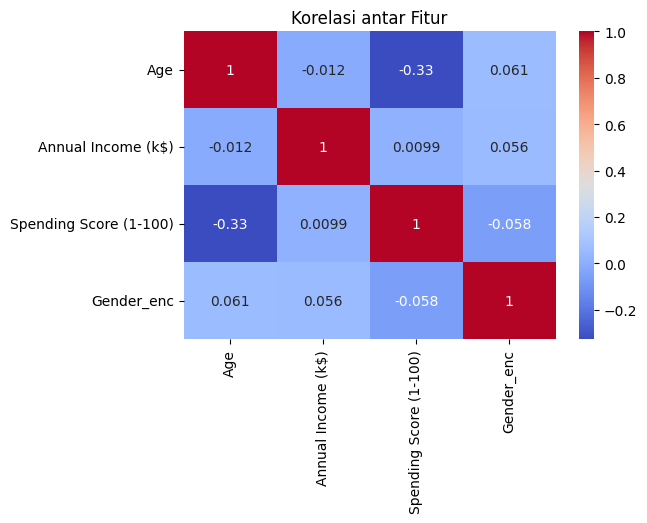

In [9]:
# Korelasi antar variabel
plt.figure(figsize=(6,4))
sns.heatmap(df_prep.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur")
plt.show()


# **Clustering (K-Means)**

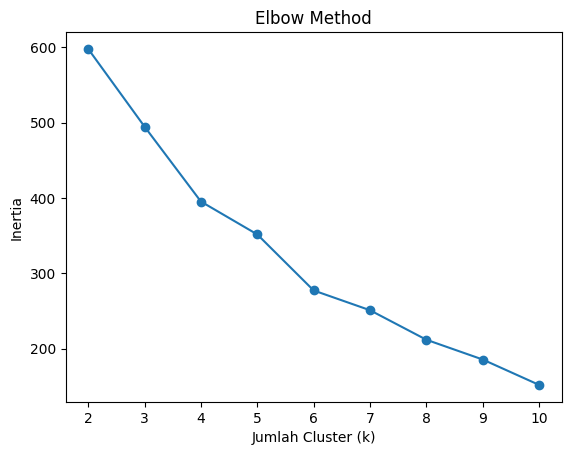

In [10]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [11]:
# Evaluasi Silhouette Score untuk setiap k
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.2776
k=3, Silhouette Score=0.2576
k=4, Silhouette Score=0.2901
k=5, Silhouette Score=0.2719
k=6, Silhouette Score=0.3348
k=7, Silhouette Score=0.3457
k=8, Silhouette Score=0.3728
k=9, Silhouette Score=0.3876
k=10, Silhouette Score=0.4208


In [12]:
# Pilih k terbaik (nilai tertinggi)
best_k = K[np.argmax(silhouette_scores)]
print(f"\nBest k: {best_k}")


Best k: 10


# **Visualisasi Cluster**

In [13]:
# Model akhir dengan k terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

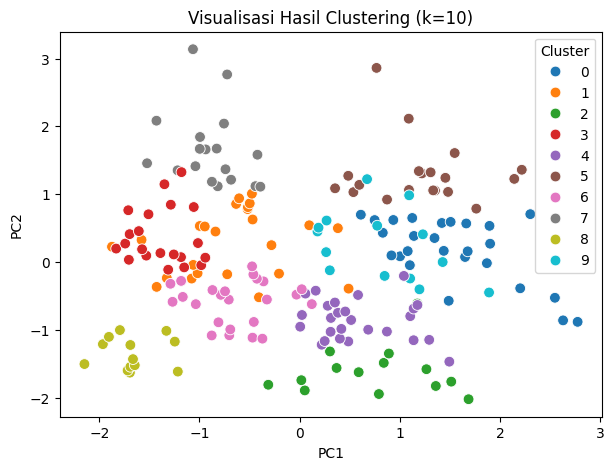

In [14]:
# PCA 2D visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title(f"Visualisasi Hasil Clustering (k={best_k})")
plt.show()


# **Evaluasi & Interpretasi Cluster**

In [15]:
# Evaluasi akhir
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score Akhir: {sil_score:.3f}")


Silhouette Score Akhir: 0.421


In [16]:
# Statistik per cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nRata-rata setiap cluster:\n", cluster_summary)


Rata-rata setiap cluster:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        58.846154           48.692308               39.846154
1        25.250000           41.250000               60.916667
2        41.214286           26.071429               20.142857
3        32.190476           86.047619               81.666667
4        54.153846           54.230769               48.961538
5        38.473684           85.894737               14.210526
6        27.960000           57.360000               47.120000
7        33.277778           87.111111               82.666667
8        25.461538           25.692308               80.538462
9        43.785714           93.285714               20.642857


In [17]:
# Interpretasi singkat
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i}:")
    print(f"- Rata-rata Umur: {row['Age']:.1f}")
    print(f"- Pendapatan Tahunan: {row['Annual Income (k$)']:.1f}k$")
    print(f"- Skor Pengeluaran: {row['Spending Score (1-100)']:.1f}")


Cluster 0:
- Rata-rata Umur: 58.8
- Pendapatan Tahunan: 48.7k$
- Skor Pengeluaran: 39.8

Cluster 1:
- Rata-rata Umur: 25.2
- Pendapatan Tahunan: 41.2k$
- Skor Pengeluaran: 60.9

Cluster 2:
- Rata-rata Umur: 41.2
- Pendapatan Tahunan: 26.1k$
- Skor Pengeluaran: 20.1

Cluster 3:
- Rata-rata Umur: 32.2
- Pendapatan Tahunan: 86.0k$
- Skor Pengeluaran: 81.7

Cluster 4:
- Rata-rata Umur: 54.2
- Pendapatan Tahunan: 54.2k$
- Skor Pengeluaran: 49.0

Cluster 5:
- Rata-rata Umur: 38.5
- Pendapatan Tahunan: 85.9k$
- Skor Pengeluaran: 14.2

Cluster 6:
- Rata-rata Umur: 28.0
- Pendapatan Tahunan: 57.4k$
- Skor Pengeluaran: 47.1

Cluster 7:
- Rata-rata Umur: 33.3
- Pendapatan Tahunan: 87.1k$
- Skor Pengeluaran: 82.7

Cluster 8:
- Rata-rata Umur: 25.5
- Pendapatan Tahunan: 25.7k$
- Skor Pengeluaran: 80.5

Cluster 9:
- Rata-rata Umur: 43.8
- Pendapatan Tahunan: 93.3k$
- Skor Pengeluaran: 20.6
